Metal device set to: Apple M2 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-05-04 05:53:54.644599: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/1000
46/46 [==============================] - 1s 8ms/step - loss: 180769.7344
Epoch 2/1000
46/46 [==============================] - 0s 6ms/step - loss: 178002.8750
Epoch 3/1000
46/46 [==============================] - 0s 6ms/step - loss: 163610.4531
Epoch 4/1000
46/46 [==============================] - 0s 6ms/step - loss: 124998.5078
Epoch 5/1000
46/46 [==============================] - 0s 6ms/step - loss: 77033.0469
Epoch 6/1000
46/46 [==============================] - 0s 6ms/step - loss: 58972.1250
Epoch 7/1000
46/46 [==============================] - 0s 6ms/step - loss: 52564.7070
Epoch 8/1000
46/46 [==============================] - 0s 6ms/step - loss: 47931.8945
Epoch 9/1000
46/46 [==============================] - 0s 6ms/step - loss: 42859.4062
Epoch 10/1000
46/46 [==============================] - 0s 6ms/step - loss: 39126.7031
Epoch 11/1000
46/46 [==============================] - 0s 6ms/step - loss: 36627.6641
Epoch 12/1000
46/46 [==============================] - 0s 6

<Axes: >

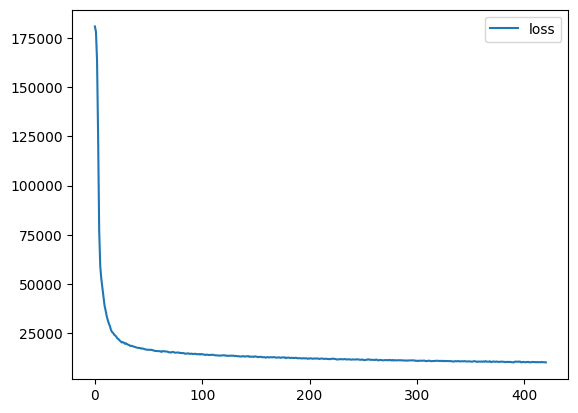

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer

houses_train = pd.get_dummies(pd.read_csv('train.csv'))
houses_test = pd.get_dummies(pd.read_csv('test.csv'))
houses_test.reindex(columns = houses_train.columns, fill_value=0)
numeric_features_names = ['KitchenAbvGr', 'SaleType_Oth', 'HeatingQC_TA', 'SaleCondition_Family', 'Condition1_Feedr', 'BsmtFinType2_Rec', 'MSZoning_RM', 'HouseStyle_SLvl', 'MSZoning_RH', 'Condition2_Feedr', 'RoofStyle_Shed', 'ExterQual_Gd', 'GarageCars', 'FullBath', 'LotShape_IR3', 'BsmtExposure_Mn', 'FireplaceQu_TA', 'KitchenQual_Gd', 'LotConfig_FR3', 'GarageCond_Po', 'GarageArea', 'BsmtFinType2_Unf', 'Electrical_Mix', 'PavedDrive_P', 'Functional_Sev', 'GarageQual_Po', '1stFlrSF', 'BsmtQual_Fa', 'GrLivArea', 'ExterCond_Po', 'BsmtQual_Gd', 'BsmtCond_Po', 'OverallQual', 'KitchenQual_Fa', 'Fireplaces', 'LandContour_Low', 'TotalBsmtSF', 'OverallCond', 'Foundation_CBlock', 'YearBuilt', 'TotRmsAbvGrd', 'ExterCond_TA', 'ExterQual_Fa', 'GarageFinish_RFn', 'MSSubClass', 'YearRemodAdd', 'HalfBath', 'HouseStyle_1.5Unf', 'BedroomAbvGr', 'MoSold', 'BsmtFullBath', 'LotArea', 'Exterior2nd_Wd Shng', 'HouseStyle_2.5Unf', '2ndFlrSF', 'Exterior1st_Stucco', 'GarageType_Detchd', 'BsmtFinType1_BLQ', 'HeatingQC_Po', 'GarageType_CarPort', 'BsmtFinSF1', 'Exterior2nd_Stucco', 'BsmtUnfSF', 'YrSold', 'FireplaceQu_Po']
numeric_features = houses_train[numeric_features_names]
sale_price = houses_train['SalePrice']
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(numeric_features)
X_train_imp = imp.transform(numeric_features)
X = tf.convert_to_tensor(X_train_imp)
Y = tf.convert_to_tensor(houses_train['SalePrice'])

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X)

model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1)
])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
model.compile(
    loss='mean_absolute_error', 
    optimizer=tf.keras.optimizers.legacy.Adam(0.003),
)
hist = model.fit(X, Y, epochs=1000, verbose=1, callbacks=[callback])
history_df = pd.DataFrame(hist.history)
history_df.loc[:, ['loss']].plot()

46/46 [==============================] - 0s 3ms/step


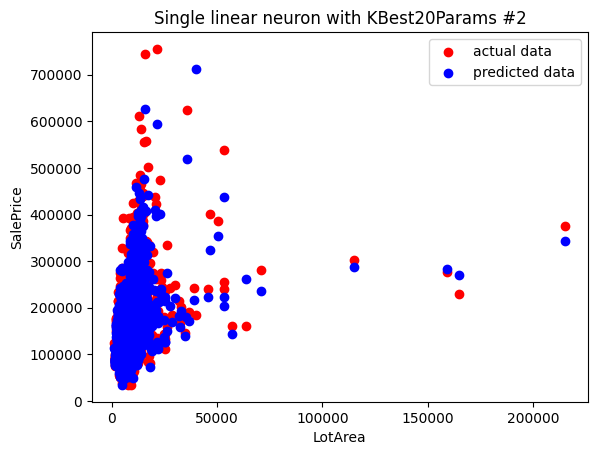

In [2]:

import matplotlib.pyplot as plt
Y_predict = model.predict(X)
plt.scatter(numeric_features.LotArea, sale_price, color='red', label='actual data')
plt.scatter(numeric_features.LotArea, Y_predict, color='blue', label='predicted data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Single linear neuron with KBest20Params #2')
plt.legend()


In [9]:
houses_test = houses_test.reindex(columns = houses_train.columns, fill_value=0)
X_test = tf.convert_to_tensor(houses_test[numeric_features_names])
Y_test = model.predict(X_test)
arr = np.concatenate((np.array(houses_test['Id']).reshape(-1, 1), Y_test), axis=1)
np.savetxt("submission11.csv", arr, fmt='%d,%1.5f', header='Id,SalePrice', comments='')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).